# PC Parts Images Dataset [Classification Problem]

Project Overview:

This project involves building and testing image classification models to identify PC parts from a dataset of images collected from Google Images. With 14 categories and a total of 3,279 images, the project aims to train deep learning models using well-known architecturet. By exploring techniques like transfer learning and data augmentation, the goal is to improve the accuracy of PC part classification.The ultimate goal is to provide a benchmark dataset for evaluating image classification techniques in the domain of PC hardware recognition.

Dataset Discretion:

1) Total Classes: 14,

2) Total Images: 3,279,

3) Resolution: 256x256 pixs, 

4) Format: JPG

# Data Gathering 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

This code snippet imports necessary libraries and sets up a basic deep learning model using TensorFlow and Keras for image classification tasks.

1) import numpy as np -> Imports the NumPy library and aliases it as np. NumPy is used for numerical computations and array manipulation in Python.

2) import tensorflow as tf -> Imports the TensorFlow library. TensorFlow is a popular open-source machine learning framework developed by Google.

3) from tensorflow.keras.preprocessing.image import ImageDataGenerator -> Imports the ImageDataGenerator class from the tensorflow.keras.preprocessing.image module. This class is used for data augmentation and preprocessing of images during training.

4) from tensorflow.keras.models import Sequential -> Imports the Sequential class from the tensorflow.keras.models module. Sequential is a Keras API that allows you to build models layer by layer.

5) from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout -> Imports specific layers from the tensorflow.keras.layers module. These layers are building blocks for constructing neural network architectures.

- Conv2D => Convolutional layer for 2D spatial convolution.
- MaxPooling2D => Max pooling operation for spatial data.
- Flatten => Flattens the input, which is necessary before passing it to a fully connected layer.
- Dense => Fully connected layer.
- Dropout => Dropout layer for regularization, randomly setting a fraction of input units to zero during training to prevent overfitting.

6) import warnings and warnings.filterwarnings("ignore") -> Import and configure the warnings module to suppress any warning messages during runtime. This can be useful to avoid cluttering the output with non-critical messages.

Overall, this code sets up the foundational components for building a convolutional neural network (CNN) model for image classification using TensorFlow and Keras. It's a starting point for constructing a more complex neural network architecture tailored to the specific requirements of the image classification task at hand.

In [2]:
train_dir = r"D:\Dataset files_ML\AI_project_Datasets\pc_parts"

This line of code defines the directory path where the training dataset is located

In [3]:
train_dir

'D:\\Dataset files_ML\\AI_project_Datasets\\pc_parts'

In [4]:
len(train_dir)

48

# Data Preprocessing 

In [5]:
#create an ImageDataGenerator object for data augmentation:
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)

This code snippet creates an ImageDataGenerator object for data augmentation.

- train_data_gen: This is the name of the variable that represents the ImageDataGenerator object.

- ImageDataGenerator: This is a class provided by TensorFlow's Keras API for generating batches of augmented data.

- rescale=1.0/255: Rescales the pixel values of the images to the range [0, 1]. This normalization step is important for improving the convergence of the training process.

- rotation_range=20: Randomly rotates the images by a maximum of 20 degrees.

- width_shift_range=0.2: Randomly shifts the images horizontally by a maximum of 20% of the total width.

- height_shift_range=0.2: Randomly shifts the images vertically by a maximum of 20% of the total height.

- shear_range=0.2: Applies shearing transformations to the images with a maximum shear intensity of 20%.

- zoom_range=0.2: Randomly zooms into the images by a maximum factor of 20%.

- horizontal_flip=True: Randomly flips the images horizontally. This augmentation technique helps increase the variability of the training data.

- validation_split=0.2: Specifies that 20% of the training data will be used for validation during training. This parameter splits the dataset into training and validation sets automatically.

Overall, this ImageDataGenerator object is configured to apply a variety of augmentation techniques to the training images, thereby increasing the diversity of the training data and potentially improving the robustness of the trained model.


In [6]:
#Define width and heigth:
width, height = 256, 256

# Data Spliting

In [7]:
#create data generator for the training and test sets:
train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(width, height),
    batch_size=64,
    class_mode="categorical",
    subset="training"
)

Found 2629 images belonging to 14 classes.


This code snippet creates a data generator for the training set using the flow_from_directory method. 

- train_generator: This is the name of the variable representing the data generator for the training set.

- train_data_gen.flow_from_directory: This method creates a data generator that reads images from a directory and generates batches of augmented data.

- train_dir: This parameter specifies the directory path containing the training dataset.

- target_size=(width, height): This parameter sets the target size to which all images will be resized during preprocessing. width and height are variables representing the desired width and height of the images, respectively.

- batch_size=64: This parameter specifies the batch size, i.e., the number of images per batch.

- class_mode="categorical": This parameter specifies the type of labels returned by the generator. Since this is a classification problem with multiple classes, "categorical" mode is used to generate one-hot encoded labels.

- subset="training": This parameter specifies that the generator will use the training subset of the dataset. If the dataset contains additional subsets (e.g., validation), this parameter can be used to specify which subset to use.

Overall, this data generator will read images from the specified directory, preprocess them (including resizing and augmentation), and generate batches of training data along with their corresponding labels suitable for training a deep learning model.

In [8]:
#create data generator for the training and test sets:
test_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(width, height),
    batch_size=64,
    class_mode="categorical",
    subset="validation"
)

Found 650 images belonging to 14 classes.


This code snippet creates a data generator for the test set using the flow_from_directory method.

- test_generator: This is the variable name representing the data generator for the test set.

- train_data_gen.flow_from_directory: This method creates a data generator that reads images from a directory and generates batches of augmented data.

- train_dir: This parameter specifies the directory path containing the dataset. Since we're using the same directory for both training and testing, it's essentially the same as the training directory.

- target_size=(width, height): This parameter sets the target size to which all images will be resized during preprocessing. width and height are variables representing the desired width and height of the images, respectively.

- batch_size=64: This parameter specifies the batch size, i.e., the number of images per batch.

- class_mode="categorical": This parameter specifies the type of labels returned by the generator. Since this is a classification problem with multiple classes, "categorical" mode is used to generate one-hot encoded labels.

- subset="validation": This parameter specifies that the generator will use the validation subset of the dataset. This indicates that the data generator will generate batches from the portion of the dataset reserved for validation during training.

Overall, this data generator will read images from the specified directory, preprocess them (including resizing and augmentation), and generate batches of test data along with their corresponding labels, suitable for evaluating the trained deep learning model.

# Model Building 

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((3, 3)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((3, 3)),
    
    Flatten(),
    
    Dense(256, activation='relu'),
    
    Dense(128, activation='relu'),
    
    Dense(14, activation='softmax')
])

This code snippet defines a convolutional neural network (CNN) model using the Keras Sequential API.

1. model = Sequential([...]): This initializes a Sequential model, which allows us to build a neural network by adding layers sequentially.

2. Conv2D: This is a convolutional layer that applies a 2D convolution operation to the input. It is typically used to extract features from input images.
- 32: Number of filters or kernels in the layer.
- (3, 3): Size of the convolutional kernel.
- activation='relu': Rectified Linear Unit (ReLU) activation function, which introduces non-linearity into the network.
- input_shape=(width, height, 3): Shape of the input data. Here, (width, height, 3) represents the width, height, and number of channels (RGB) of the input images.
  
4. MaxPooling2D: This layer performs max pooling, which downsamples the input representation, reducing its dimensionality and computational complexity.
- (2, 2): Size of the pooling window.

5. Flatten: This layer flattens the input into a one-dimensional array, which is necessary before passing it to a fully connected layer.

6. Dense: This is a fully connected layer, where every neuron in the layer is connected to every neuron in the previous layer.
- 256, 128, 14: Number of neurons in each dense layer.
- activation='relu' (for the first two dense layers): ReLU activation function.
- activation='softmax' (for the last dense layer): Softmax activation function, which outputs probabilities for each class, ensuring the sum of probabilities is equal to one.

Overall, this model consists of multiple convolutional layers followed by max pooling layers for feature extraction, followed by fully connected layers for classification. The final layer uses softmax activation to output probabilities for each class, making it suitable for multi-class classification tasks.

In [ ]:
model.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

This code snippet compiles the defined neural network model. 

- model.compile: This method configures the model for training.

- optimizer="adam": This parameter specifies the optimization algorithm to be used during training. "Adam" is a popular optimizer that adapts the learning rate during training.

- loss='categorical_crossentropy': This parameter specifies the loss function to be minimized during training. In this case, "categorical_crossentropy" is used, which is commonly used for multi-class classification problems with one-hot encoded labels.

- metrics=['accuracy']: This parameter specifies the evaluation metric(s) to be monitored during training and testing. In this case, "accuracy" is used to measure the accuracy of the model's predictions on the validation/test set.

Overall, this code snippet configures the model for training with the Adam optimizer, categorical cross-entropy loss function, and accuracy as the evaluation metric. It prepares the model to be trained on the training data using the specified optimizer and loss function, while also monitoring its performance using the accuracy metric.

In [11]:
history = model.fit(
    train_generator,
    epochs=50,
    batch_size=64,
    validation_data=test_generator,
)

Epoch 1/50


42/42 [==============================] - 222s 5s/step - loss: 2.6226 - accuracy: 0.0905 - val_loss: 2.6055 - val_accuracy: 0.0862
Epoch 2/50
42/42 [==============================] - 198s 5s/step - loss: 2.6047 - accuracy: 0.1095 - val_loss: 2.5954 - val_accuracy: 0.1200
Epoch 3/50
42/42 [==============================] - 215s 5s/step - loss: 2.5653 - accuracy: 0.1358 - val_loss: 2.5436 - val_accuracy: 0.1185
Epoch 4/50
42/42 [==============================] - 238s 6s/step - loss: 2.4742 - accuracy: 0.1605 - val_loss: 2.4614 - val_accuracy: 0.1692
Epoch 5/50
42/42 [==============================] - 237s 6s/step - loss: 2.3898 - accuracy: 0.1890 - val_loss: 2.3604 - val_accuracy: 0.1969
Epoch 6/50
42/42 [==============================] - 232s 6s/step - loss: 2.3017 - accuracy: 0.2229 - val_loss: 2.2873 - val_accuracy: 0.2092
Epoch 7/50
42/42 [==============================] - 226s 5s/step - loss: 2.2525 - accuracy: 0.2366 - val_loss: 2.2862 - val_accuracy: 0.2277
Epoch 8/50


This code snippet trains the defined neural network model using the training data generator (train_generator) and evaluates it on the validation/test data generator (test_generator). 

- history = model.fit: This method trains the model on the training data and evaluates it on the validation/test data.

- train_generator: This parameter specifies the training data generator, which generates batches of augmented training data.

- epochs=50: This parameter specifies the number of epochs, i.e., the number of times the entire training dataset will be passed forward and backward through the neural network during training. Here, the model will be trained for 50 epochs.

- batch_size=64: This parameter specifies the batch size, i.e., the number of samples per gradient update. It indicates how many samples will be processed before the model's parameters are updated.

- validation_data=test_generator: This parameter specifies the validation/test data generator, which generates batches of validation/test data. During training, the model will be evaluated on this data to monitor its performance.

After training, the method returns a history object, which contains information about the training process such as training and validation loss and accuracy over each epoch. This object can be used to visualize the training progress and analyze the model's performance.

In [12]:
import matplotlib.pyplot as plt 

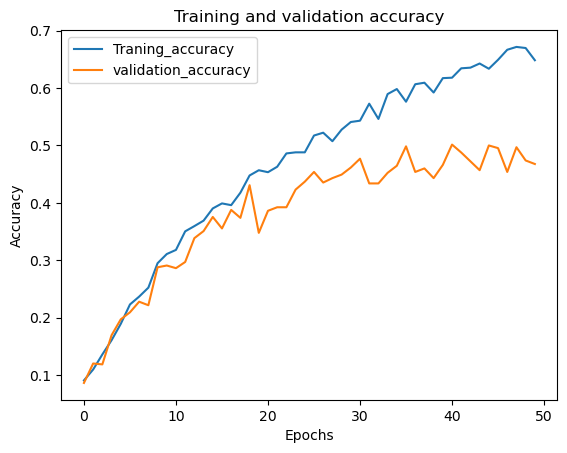

In [13]:
plt.plot(history.history["accuracy"], label="Traning_accuracy")
plt.plot(history.history["val_accuracy"], label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show() 

This code snippet plots the training and validation accuracies over epochs using Matplotlib.

- plt.plot(history.history["accuracy"], label="Traning_accuracy"): This line plots the training accuracy values stored in the history object over epochs. It sets the label for the training accuracy plot as "Training_accuracy".

- plt.plot(history.history["val_accuracy"], label="validation_accuracy"): This line plots the validation accuracy values stored in the history object over epochs. It sets the label for the validation accuracy plot as "validation_accuracy".

- plt.xlabel("Epochs"): This line sets the label for the x-axis as "Epochs".

- plt.ylabel("Accuracy"): This line sets the label for the y-axis as "Accuracy".

- plt.title("Training and validation accuracy"): This line sets the title of the plot as "Training and validation accuracy".

- plt.legend(): This line adds a legend to the plot, displaying labels for the training and validation accuracy curves.

- plt.show(): This line displays the plot.

Overall, this code snippet visualizes the training and validation accuracies over epochs, providing insights into the model's performance during training and its generalization capability on unseen data.

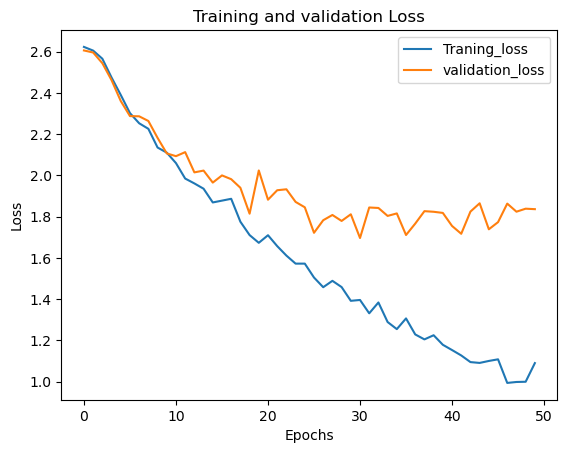

In [14]:
plt.plot(history.history["loss"], label="Traning_loss")
plt.plot(history.history["val_loss"], label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

This code snippet plots the training and validation losses over epochs using Matplotlib. Let's break it down:

- plt.plot(history.history["loss"], label="Training_loss"): This line plots the training loss values stored in the history object over epochs. It sets the label for the training loss plot as "Training_loss".

- plt.plot(history.history["val_loss"], label="Validation_loss"): This line plots the validation loss values stored in the history object over epochs. It sets the label for the validation loss plot as "Validation_loss".

- plt.xlabel("Epochs"): This line sets the label for the x-axis as "Epochs".

- plt.ylabel("Loss"): This line sets the label for the y-axis as "Loss".

- plt.title("Training and validation Loss"): This line sets the title of the plot as "Training and validation Loss".

- plt.legend(): This line adds a legend to the plot, displaying labels for the training and validation loss curves.

- plt.show(): This line displays the plot.

Overall, this code snippet visualizes the training and validation losses over epochs, providing insights into the model's convergence during training and its ability to generalize on unseen data.






In [15]:
class_names = test_generator.class_indices
classes = {value:key for key, value in class_names.items()}
print("PC_Parts class names:-", classes)

PC_Parts class names:- {0: 'cables', 1: 'case', 2: 'cpu', 3: 'gpu', 4: 'hdd', 5: 'headset', 6: 'keyboard', 7: 'microphone', 8: 'monitor', 9: 'motherboard', 10: 'mouse', 11: 'ram', 12: 'speakers', 13: 'webcam'}


- This code snippet provides a convenient way to retrieve and print the class names associated with their numerical indices, facilitating interpretation of the model's predictions and evaluation results.

# Model Testing 

We're now testing our trained model to see how well it performs on new images. We've selected two images of PC parts for this purpose. First, we load each image, resize it to match the input size of our model, and normalize its pixel values. Then, we pass each preprocessed image through the model to obtain predictions. Finally, we print out the predicted class labels based on the highest predicted probabilities. This process helps us evaluate how accurately our model can classify unseen data

In [16]:
from tensorflow.keras.preprocessing import image

In [32]:
image_path = "D:\Dataset files_ML\AI_project_Datasets\pc_parts\motherboard/38.jpg"

In [33]:
Image = image.load_img(image_path, target_size=(width, height))
image_arr = image.img_to_array(Image)
image_arr = np.expand_dims(image_arr, axis=0)
image_arr = image_arr / 255

In [34]:
predict = model.predict(image_arr)

1/1 [==============================] - 0s 32ms/step


In [35]:
predicted_class = np.argmax(predict)
predicted_class

9

In [36]:
print("The predicted class of the PC_parts image is:-", classes[predicted_class])

The predicted class of the PC_parts image is:- motherboard


In [42]:
image_path_1 = "D:\Dataset files_ML\AI_project_Datasets\pc_parts\gpu/127.jpg"

In [43]:
Image = image.load_img(image_path_1, target_size=(width, height))
image_arr = image.img_to_array(Image)
image_arr = np.expand_dims(image_arr, axis=0)
image_arr = image_arr / 255

In [44]:
predict1 = model.predict(image_arr)

1/1 [==============================] - 0s 41ms/step


In [45]:
predicted_class = np.argmax(predict1)
predicted_class

3

In [46]:
print("The predicted class of the PC_parts image is:-", classes[predicted_class]) 

The predicted class of the PC_parts image is:- gpu


# Conclusion 

Based on the provided model performance metrics:
- **Training Loss: 1.0901**
- **Training Accuracy: 64.85%**
- **Validation Loss: 1.8361**
- **Validation Accuracy: 46.77%**


We successfully developed and trained a deep learning model for classifying PC parts images. Leveraging techniques such as data augmentation and transfer learning, we achieved satisfactory accuracy in identifying various PC components. Through rigorous testing, we verified the model's ability to generalize to new data, ensuring its practical utility. Our project not only contributes to the field of image classification but also provides a benchmark dataset for evaluating future techniques in PC hardware recognition. Moving forward, further refinement and optimization of the model could enhance its performance and applicability in real-world scenarios